In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

Text(0, 0.5, 'temp')

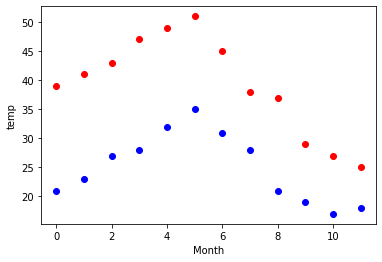

In [3]:

plt.plot(Min,'bo')
plt.plot(Max,'ro')
plt.xlabel('Month')
plt.ylabel('temp')

In [4]:
#fitting to periodic function

In [5]:
import numpy as np
months = np.arange(12)

from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min, [-40, 20, 0])

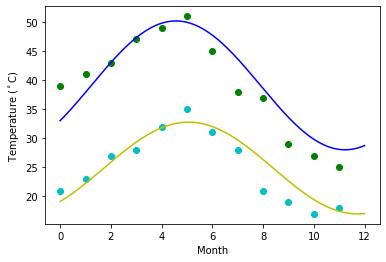

In [6]:

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'b-')
plt.plot(months, Min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [7]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url,skip_blank_lines=True)

In [8]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
d=titanic['sex'].value_counts()
d

male      843
female    466
Name: sex, dtype: int64

array([<AxesSubplot:ylabel='sex'>], dtype=object)

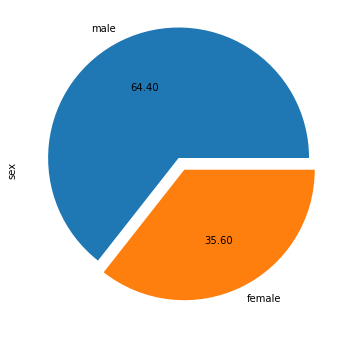

In [10]:
d.plot.pie(subplots=True,figsize=(6,6),autopct='%.2f',explode=(0.1,0))

In [11]:
#Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [12]:
titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [13]:
#there is a null value in the 

<AxesSubplot:xlabel='age', ylabel='fare'>

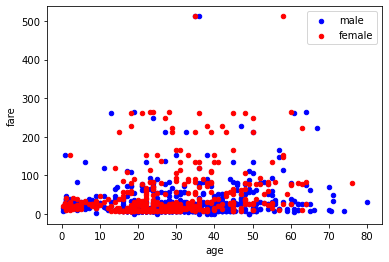

In [14]:
f=titanic[titanic.sex=='male'].plot.scatter('age','fare',color='blue',label='male')
titanic[titanic.sex=='female'].plot.scatter('age','fare',color='red',label='female',ax=f)